# 02b - Torus Skeletonization Demo

In [1]:
from discos import *
import trimesh
import numpy as np
import networkx as nx

## Create and Visualize Torus

In [2]:
# Create a torus mesh
torus = create_torus_mesh(major_radius=3.0, minor_radius=1.0, major_segments=24, minor_segments=12)

# Rotate so the torus lies on its side (ensures slices through the hole)
torus.apply_transform(trimesh.transformations.rotation_matrix(
    angle=np.pi / 2,
    direction=[1, 0, 0],
    point=torus.centroid
))

print(f"Torus properties:")
print(f"  Volume: {torus.volume:.3f}")
print(f"  Surface area: {torus.area:.3f}")
print(f"  Z-bounds: {torus.bounds[:, 2]}")

mm = MeshManager(torus)

# Visualize the original torus
fig = mm.visualize_mesh_3d(title="Original Torus", backend="plotly")
fig.show()

Torus properties:
  Volume: 55.905
  Surface area: 116.254
  Z-bounds: [-4.  4.]


In [3]:
mm.visualize_mesh_slice_interactive()

## Skeletonization

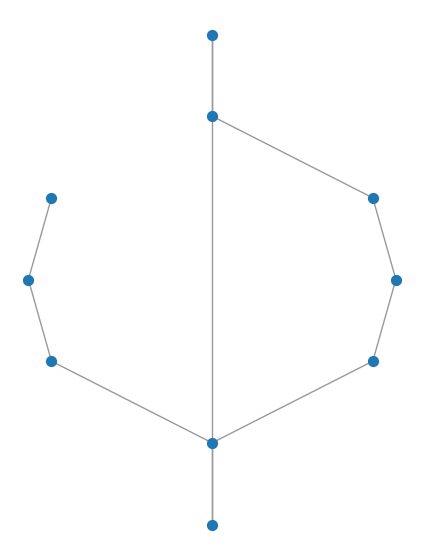

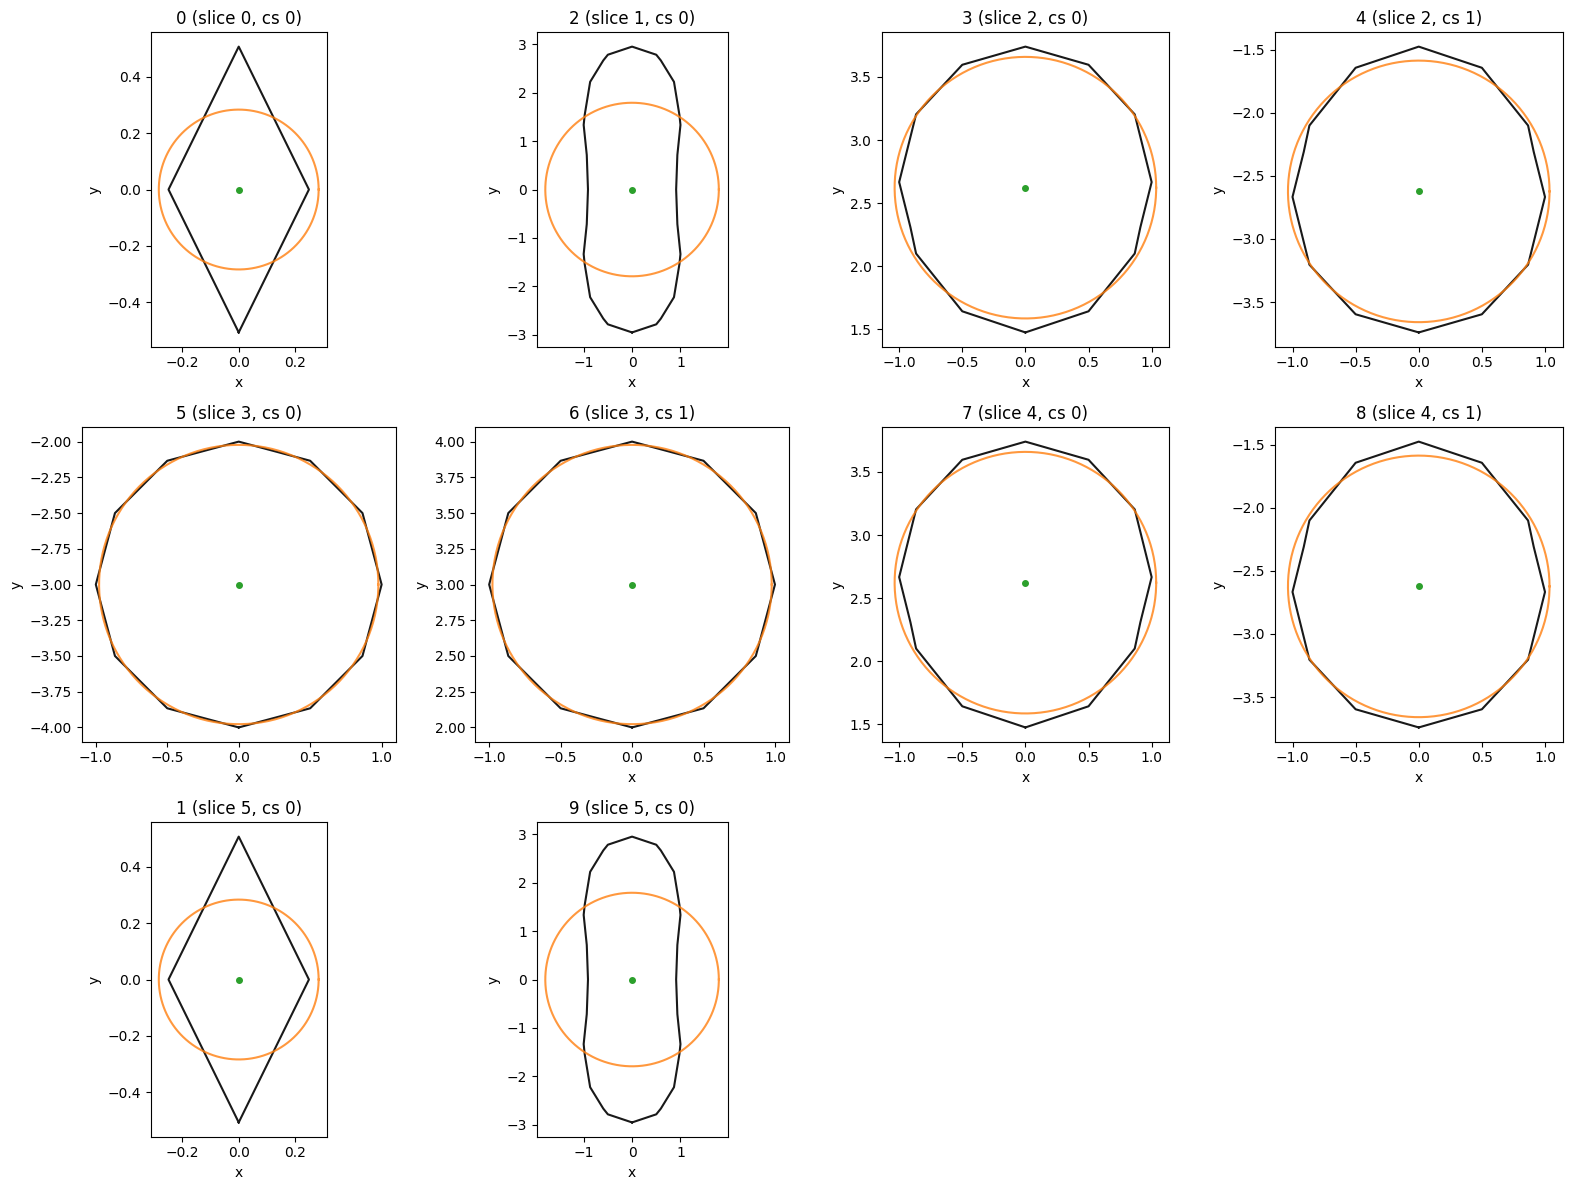

In [12]:
n_slices = 6
G = skeletonize(torus, n_slices=n_slices, verbose=True, enforce_connected=False)
G.draw(axis='y', figsize=(7, 7))
G.plot_all_cross_sections();

In [5]:
# write swc to file
G.to_swc(data_path(f"swc/demos/torus_n{n_slices}.swc"))

## Summary

The torus segmentation demonstrates:
- **Complex topology**: Middle slices contain multiple segments due to the hole
- **Ring connectivity**: Segments form a circular arrangement in 3D space
- **Genus = 1 handling**: Algorithm correctly identifies separate connected components within slices
- **Spatial relationships**: 3D visualization reveals the donut structure

This showcases the algorithm's ability to handle complex topologies with holes.